In [1]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import Input, Dense
from keras.models import Model
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
import tensorflow.keras.backend as K


Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:

data= pd.read_csv('drive/My Drive/BE FINAL/my_5class_shuffled.csv', index_col=None)
#data= pd.read_csv('drive/My Drive/BE FINAL/Small Training Set_5class.csv', index_col=None)

smdata= pd.read_csv('drive/My Drive/BE FINAL/KDDTest11_5.csv', index_col=None)

data.shape

(148514, 42)

In [4]:
from sklearn.model_selection import train_test_split
traindata,testdata = train_test_split(data, test_size=0.1, random_state=42)#random for splitting same data when run again.
traindata,valdata = train_test_split(traindata, test_size=0.11, random_state=42)#random for splitting same data when run again.

print(valdata.shape)
print(traindata.shape)
print(testdata.shape)


(14703, 42)
(118959, 42)
(14852, 42)


In [5]:
from collections import Counter
print(Counter(traindata["label"]))
print(Counter(testdata["label"]))
print(Counter(valdata["label"]))
print(Counter(smdata["label"]))


Counter({'normal': 61633, 'dos': 42877, 'probe': 11278, 'r2l': 2975, 'u2r': 196})
Counter({'normal': 7721, 'dos': 5275, 'probe': 1415, 'r2l': 406, 'u2r': 35})
Counter({'normal': 7698, 'dos': 5232, 'probe': 1384, 'r2l': 368, 'u2r': 21})
Counter({'normal': 9711, 'dos': 7458, 'r2l': 2754, 'probe': 2421, 'u2r': 200})


In [6]:
from sklearn.preprocessing import LabelEncoder
encodings = dict()
for c in traindata.columns:
    #print df[c].dtype
    if traindata[c].dtype == "object":
        encodings[c] = LabelEncoder() #to give numerical label to char type labels.
        encodings[c]
        traindata[c] = encodings[c].fit_transform(traindata[c])
        testdata[c] = encodings[c].fit_transform(testdata[c])
        valdata[c] = encodings[c].fit_transform(valdata[c])
encodings1 = dict()
for c in smdata.columns:
    #print df[c].dtype
    if smdata[c].dtype == "object":
        encodings1[c] = LabelEncoder() #to give numerical label to char type labels.
        encodings1[c]
        smdata[c] = encodings1[c].fit_transform(smdata[c])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [7]:
print(Counter(traindata["label"]))
print(Counter(testdata["label"]))
print(Counter(valdata["label"]))
print(Counter(smdata["label"]))


Counter({1: 61633, 0: 42877, 2: 11278, 3: 2975, 4: 196})
Counter({1: 7721, 0: 5275, 2: 1415, 3: 406, 4: 35})
Counter({1: 7698, 0: 5232, 2: 1384, 3: 368, 4: 21})
Counter({1: 9711, 0: 7458, 3: 2754, 2: 2421, 4: 200})


In [8]:
X = traindata.iloc[:,0:41]
Y = traindata.iloc[:,41]
C = testdata.iloc[:,41]
T = testdata.iloc[:,0:41]
vx = valdata.iloc[:,0:41]
vy = valdata.iloc[:,41]
smx = smdata.iloc[:,0:41]
smy = smdata.iloc[:,41]
smx.head()

,duration,"""protocol_type""","""service""","""flag""","""src_bytes""","""dst_bytes""",land,"""wrong_fragment""",urgent,"""hot""",num_failed_logins,logged_in,num_compromised,"""root_shell""",su_attempted,num_root,num_file_creations,num_shells,"""num_access_files""",num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_diff_srv_rate.1,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,1,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,1,19,9,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,0,13,9,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,1,55,2,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [0]:
X=X.drop(['land','su_attempted','num_outbound_cmds','is_host_login','urgent','num_failed_logins','su_attempted','num_file_creations','num_shells','srv_diff_host_rate'], axis = 1) 
T=T.drop(['land','su_attempted','num_outbound_cmds','is_host_login','urgent','num_failed_logins','su_attempted','num_file_creations','num_shells','srv_diff_host_rate'], axis = 1) 
vx=vx.drop(['land','su_attempted','num_outbound_cmds','is_host_login','urgent','num_failed_logins','su_attempted','num_file_creations','num_shells','srv_diff_host_rate'], axis = 1) 
smx=smx.drop(['land','su_attempted','num_outbound_cmds','is_host_login','urgent','num_failed_logins','su_attempted','num_file_creations','num_shells','srv_diff_host_rate'], axis = 1) 

In [0]:
from sklearn.preprocessing import StandardScaler #normalization
trainX= StandardScaler().fit_transform(X)
testT= StandardScaler().fit_transform(T)
valx= StandardScaler().fit_transform(vx)
smx= StandardScaler().fit_transform(smx)


In [11]:
trainX_nn = np.array(X)
testT_nn = np.array(T)
valx_nn = np.array(vx)
smx_nn = np.array(smx)

trainX_nn.astype(float)
testT_nn.astype(float)
valx_nn.astype(float)
smx_nn.astype(float)

array([[-0.15553409, -0.17630335,  0.93396356, ..., -0.3527496 ,
         1.97979091,  1.9291162 ],
       [-0.15553409, -0.17630335,  0.93396356, ..., -0.3527496 ,
         1.97979091,  1.9291162 ],
       [-0.15411277, -0.17630335, -0.88225435, ..., -0.3527496 ,
        -0.60271888, -0.56548308],
       ...,
       [-0.15553409, -0.17630335, -0.67269075, ..., -0.3527496 ,
        -0.4219432 , -0.39086113],
       [-0.15553409,  2.34244362, -1.44109063, ..., -0.3527496 ,
        -0.60271888, -0.56548308],
       [-0.15553409, -0.17630335,  1.42294531, ..., -0.3527496 ,
         0.53358543,  1.9291162 ]])

In [0]:
scaler = Normalizer().fit(trainX_nn)
trainX_nn = scaler.transform(trainX_nn)

scaler = Normalizer().fit(testT_nn)
testT_nn = scaler.transform(testT_nn)

scaler = Normalizer().fit(valx_nn)
valx_nn = scaler.transform(valx_nn)

scaler = Normalizer().fit(smx_nn)
smx_nn = scaler.transform(smx_nn)

In [13]:
y_train = np.array(Y)
y_test = np.array(C)
valy = np.array(vy)
smy = np.array(smy)

from collections import Counter
Counter(y_train)
Counter(y_test)
valy[4]=4
Counter(valy)

Counter({0: 5232, 1: 7697, 2: 1384, 3: 368, 4: 22})

In [14]:
y_train1= to_categorical(y_train)
y_test1= to_categorical(y_test)
valy1= to_categorical(valy)
smy1= to_categorical(smy)

X_train = np.array(trainX)
X_test = np.array(testT)##
X_val = np.array(valx)##
X_sm = np.array(smx)##

X_train_nn = np.array(trainX_nn)
X_test_nn = np.array(testT_nn)##
x_val_nn = np.array(valx_nn)##
x_sm_nn = np.array(smx_nn)##


batch_size = 64
print(y_train1.shape)
print(y_test1.shape)
X_train.shape

(118959, 5)
(14852, 5)


(118959, 32)

In [15]:
    # reshape input to be [samples, time steps, features]
X_train1_nn = np.reshape(X_train_nn, (X_train_nn.shape[0],X_train_nn.shape[1],1))
X_test1_nn = np.reshape(X_test_nn, (X_test_nn.shape[0],X_test_nn.shape[1],1))
x_val1_nn = np.reshape(x_val_nn, (x_val_nn.shape[0],x_val_nn.shape[1],1))
x_sm1_nn = np.reshape(x_sm_nn, (x_sm_nn.shape[0],x_sm_nn.shape[1],1))

X_train1_nn.shape

(118959, 32, 1)

In [0]:
from keras.models import model_from_json

json_file = open('drive/My Drive/BE FINAL/nsl-kdd_final-code_results/cnn_model.json', 'r')
nn_model_json = json_file.read()
json_file.close()
cnn = model_from_json(nn_model_json)
 #load weights into new model
cnn.load_weights("drive/My Drive/BE FINAL/nsl-kdd_final-code_results/cnn_model.h5")

#knn_model = joblib.load('C:/Users/Aditya Kyatham/AppData/Local/Programs/Python/Python36/FINAL_BE_PROJ/CIC/knn_model.sav')

In [0]:
from keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.models import model_from_json

cnn = Sequential()
cnn.add(Conv1D(64, 3, activation="relu", input_shape=(32, 1), padding="same"))
cnn.add(Conv1D(64, 3, activation="relu", padding="same"))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Conv1D(128, 3, activation="relu", padding="same"))
cnn.add(Conv1D(128, 3, activation="relu", padding="same"))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dense(256, activation="relu"))
cnn.add(Dropout(0.5))
cnn.add(Dense(5, activation="softmax"))
cnn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])#,tf.keras.metrics.Precision()])#, tf.keras.metrics.Recall()])
stopper = EarlyStopping(monitor='val_acc', patience = 10, mode='auto')

history = cnn.fit(X_train1_nn, y_train1,batch_size=batch_size,validation_data=(x_val1_nn, valy1),epochs=1000)#,callbacks = [stopper])#,checkpointer,csv_logger])
# serialize model to JSON
#model_json = cnn.to_json()
#with open("drive/My Drive/BE FINAL/nsl-kdd_final-code_results/cnn_model.json", "w") as json_file:
    #json_file.write(model_json)
# serialize weights to HDF5
#cnn.save_weights("drive/My Drive/BE FINAL/nsl-kdd_final-code_results/cnn_model.h5")
#print("Saved model to disk")



Train on 809 samples, validate on 100 samples
Epoch 1/1000
809/809 [==============================] - 1s 1ms/step - loss: 1.1080 - acc: 0.7491 - val_loss: 0.6458 - val_acc: 0.7700
Epoch 2/1000
809/809 [==============================] - 0s 134us/step - loss: 0.6186 - acc: 0.8035 - val_loss: 0.4731 - val_acc: 0.8400
Epoch 3/1000
809/809 [==============================] - 0s 143us/step - loss: 0.5187 - acc: 0.8319 - val_loss: 0.4213 - val_acc: 0.8500
Epoch 4/1000
809/809 [==============================] - 0s 125us/step - loss: 0.4568 - acc: 0.8467 - val_loss: 0.3814 - val_acc: 0.9000
Epoch 5/1000
809/809 [==============================] - 0s 116us/step - loss: 0.4164 - acc: 0.8690 - val_loss: 0.3316 - val_acc: 0.9100
Epoch 6/1000
809/809 [==============================] - 0s 145us/step - loss: 0.3941 - acc: 0.8690 - val_loss: 0.3144 - val_acc: 0.9400
Epoch 7/1000
809/809 [==============================] - 0s 125us/step - loss: 0.3526 - acc: 0.8813 - val_loss: 0.2964 - val_acc: 0.9400
Epoc

In [0]:
#cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


pred_cnn1 = cnn.predict_classes(X_test1_nn)
loss, accuracy = cnn.evaluate(X_test1_nn, y_test1)
print(accuracy)#preci=0.99,0.99 lstm = 0.9934688930783733

# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
 
results = confusion_matrix(y_test, pred_cnn1) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_test, pred_cnn1))
print('Report : ')
print(classification_report(y_test, pred_cnn1))





102/102 [==============================] - 0s 123us/step
0.9803921568627451
Confusion Matrix :
[[33  0  0  0  0]
 [ 0 55  0  0  1]
 [ 0  0 10  0  0]
 [ 0  0  0  2  0]
 [ 0  1  0  0  0]]
Accuracy Score : 0.9803921568627451
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.98      0.98      0.98        56
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         2
           4       0.00      0.00      0.00         1

    accuracy                           0.98       102
   macro avg       0.80      0.80      0.80       102
weighted avg       0.98      0.98      0.98       102



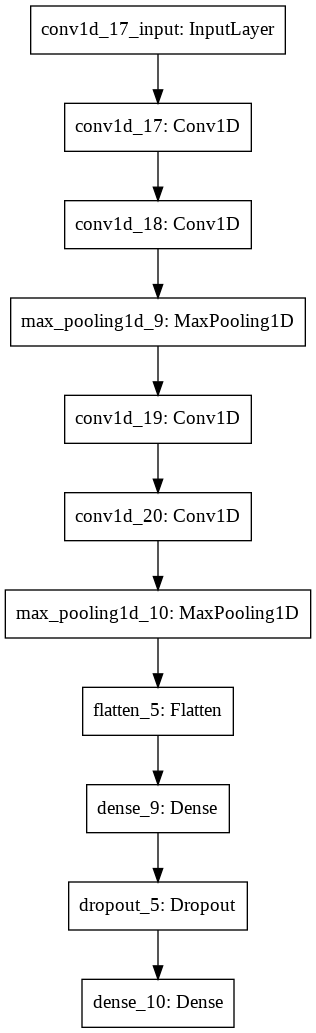

In [0]:
from keras.utils import plot_model
plot_model(cnn, to_file='drive/My Drive/BE FINAL/nsl-kdd_final-code_results/nsl_model.png')

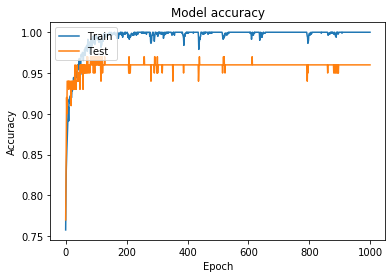

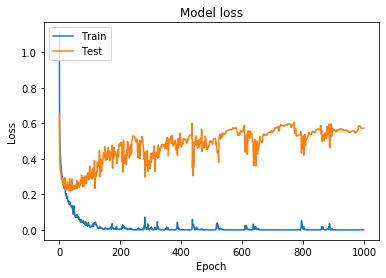

In [0]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=4,weights='uniform')
neigh.fit(X_train, y_train)
# Python script for confusion matrix creation. 

 


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [0]:
pred_knn = neigh.predict(X_test) # test the output 


In [0]:
results = confusion_matrix(y_test, pred_knn) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_test, pred_knn))
print('Report : ')
print(classification_report(y_test, pred_knn))


Confusion Matrix :
[[33  0  0  0  0]
 [ 3 53  0  0  0]
 [ 0  1  9  0  0]
 [ 0  1  0  1  0]
 [ 0  0  0  1  0]]
Accuracy Score : 0.9411764705882353
Report : 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       0.96      0.95      0.95        56
           2       1.00      0.90      0.95        10
           3       0.50      0.50      0.50         2
           4       0.00      0.00      0.00         1

    accuracy                           0.94       102
   macro avg       0.68      0.67      0.67       102
weighted avg       0.93      0.94      0.94       102



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
pred_cnn_prob = cnn.predict_proba(X_test1_nn, batch_size = 64)


In [0]:
ind=[]
for i in range(y_test.shape[0]):
  if y_test[i]!=pred_cnn1[i]:
    ind.append(i)

In [0]:
print(y_test.shape[0]-len(ind))

100


In [0]:
k=0
corr=[]
for i in range(pred_cnn_prob.shape[0]):
  if i not in ind:
    pred_cnn_prob[i].sort()
    #print(pred_cnn_prob)
    corr.append(abs(pred_cnn_prob[i][4]-pred_cnn_prob[i][3]))
    k+=1
l=0
for data in corr:
  if data<0.96:
    #print(data)
    l+=1
print(k)
print(l)


100
2


In [0]:
wrong=[]
for data in ind:
  pred_cnn_prob[data].sort()
  #print(pred_cnn_prob)
  wrong.append(abs(pred_cnn_prob[data][4]-pred_cnn_prob[data][3]))
l=0
for data in wrong:
  if data<0.96:
    #print(data)
    l+=1
print(l)
print(len(wrong))

1
2


In [0]:
error_index_nn=[]
error_index_nn_X=[]
error_index_nn_Y=[]
for i in range(pred_cnn_prob.shape[0]):
  pred_cnn_prob[i].sort()
  if abs(pred_cnn_prob[i][4]-pred_cnn_prob[i][3])<0.96:
    error_index_nn.append(i)
    error_index_nn_X.append(X_test[i])
    error_index_nn_Y.append(y_test[i])
print(len(error_index_nn))
#print(error_index_nn_X)

3


In [0]:
error_index_nn_X1 = np.array(error_index_nn_X)
#print(error_index_nn_X1)

In [16]:
from sklearn.externals import joblib
from sklearn.neighbors import KNeighborsClassifier


neigh = KNeighborsClassifier(n_neighbors=4,weights='uniform')
neigh.fit(X_train,y_train)

filename = 'drive/My Drive/BE FINAL/nsl-kdd_final-code_results/knn_model_anomaly.sav'
joblib.dump(neigh, filename)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['drive/My Drive/BE FINAL/nsl-kdd_final-code_results/knn_model_anomaly.sav']

In [0]:
pred_knn = neigh.predict(error_index_nn_X1)
print('Accuracy Score :',accuracy_score(error_index_nn_Y, pred_knn))


Accuracy Score : 0.0


In [0]:
pred_knn_prob = neigh.predict_proba(error_index_nn_X1)
#pred_cnn1 = model.predict_classes(X_test_nn)

print(pred_knn_prob)

[[0.5  0.5  0.   0.   0.  ]
 [0.   0.25 0.   0.5  0.25]
 [0.   0.5  0.5  0.   0.  ]]


In [0]:
i=0
for data in error_index_nn:

  pred_knn_prob[i].sort()
  if abs(pred_knn_prob[i][4]-pred_knn_prob[i][3])>0.00:
    pred_cnn1[data]=pred_knn[i]
  else:
    print(pred_knn_prob[i])
  i+=1


[0.  0.  0.  0.5 0.5]
[0.  0.  0.  0.5 0.5]


In [0]:
print(Counter(y_test))
print(Counter(pred_cnn1))

Counter({1: 56, 0: 33, 2: 10, 3: 2, 4: 1})
Counter({1: 55, 0: 33, 2: 10, 3: 3, 4: 1})


In [0]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
 
results = confusion_matrix(y_test, pred_cnn1) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_test, pred_cnn1))
print('Report : ')
print(classification_report(y_test, pred_cnn1))


Confusion Matrix :
[[33  0  0  0  0]
 [ 0 55  0  0  1]
 [ 0  0 10  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  1  0]]
Accuracy Score : 0.9803921568627451
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      0.98      0.99        56
           2       1.00      1.00      1.00        10
           3       0.67      1.00      0.80         2
           4       0.00      0.00      0.00         1

    accuracy                           0.98       102
   macro avg       0.73      0.80      0.76       102
weighted avg       0.98      0.98      0.98       102

